# HR: Employee Attrition (EDA Only)

## Introduction


This is a Human Resource Management(HRM), Employee Attrition Analysis. In short, HRM is also referred to as people and talent management, is the strategic discipline focused on optimizing an organization’s human capital. It encompasses key functions such as recruitment, compensation, training, and employee retention, all of which contribute to workforce development and organizational success.

While retaining top talent is widely recognized as more cost-effective than hiring new employees, it remains one of the most complex challenges faced by HR professionals. Understanding the factors driving employee attrition is essential for developing effective retention strategies.


<b>Remark:<b> 

** The dataset is extracted from [IBM website](https://www.ibm.com/communities/analytics/watson-analytics-blog/hr-employee-attrition/).
This dataset is entirely fictional and has been generated for educational and training purposes. Any resemblance to real-world data is purely coincidental.**

** Please note that this document only contains Data Cleaning and EDA, in-depth analysis will be on a separate dashboard and written report. ** 



### **Importing Pandas Library**

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### **Importing Dataset**

In [7]:
df_attrition=pd.read_csv('HR-Employee-Attrition.csv')
df_attrition.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [8]:
# Total number of rows and columns
df_attrition.shape

(1470, 35)

### **Summary Statistics**

In [10]:
# Summary of numerical columns
print(df_attrition.describe())

# Summary of categorical columns
print(df_attrition.describe(include=['object']))

               Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335            

### **General information and checking for Null values**

In [12]:
# Display unique values per categorical column
for col in df_attrition.select_dtypes(include=['object']).columns:
    print(f"{col}: {df_attrition[col].nunique()} unique values")


Attrition: 2 unique values
BusinessTravel: 3 unique values
Department: 3 unique values
EducationField: 6 unique values
Gender: 2 unique values
JobRole: 9 unique values
MaritalStatus: 3 unique values
Over18: 1 unique values
OverTime: 2 unique values


In [13]:
# General dataset info (data types, missing values, etc.)
print(df_attrition.info())

# Check for missing values
df_attrition.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

### **Summary of Entire Dataset**

In [15]:
df_attrition.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [16]:
# Attrition Summary
attrition_count=pd.DataFrame(df_attrition['Attrition'].value_counts())
attrition_count


,count
Attrition,
No,1233
Yes,237


## Data Cleaning

In [18]:
# Dropping Columns of No Use
df_attrition.drop(['EmployeeCount', 'EmployeeNumber'],axis=1)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,4,80,0,17,3,2,9,6,0,8


In [19]:
# Creating new columns "Yes" and "No" attrition column
attrition_dummies=pd.get_dummies(df_attrition['Attrition'])
attrition_dummies

,No,Yes
0,False,True
1,True,False
2,False,True
3,True,False
4,True,False
...,...,...
1465,True,False
1466,True,False
1467,True,False
1468,True,False


In [20]:
# Combing both attrition columns
df_attrition=pd.concat([df_attrition,attrition_dummies],axis=1)
df_attrition.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,No,Yes
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,0,8,0,1,6,4,0,5,False,True
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,1,10,3,3,10,7,1,7,True,False
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,0,7,3,3,0,0,0,0,False,True
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,0,8,3,3,8,7,3,0,True,False
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,1,6,3,3,2,2,2,2,True,False


In [21]:
# dropping attrition column with 'N0'
df_attrition.drop(['Attrition','No'],axis=1)

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Yes
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,...,80,0,8,0,1,6,4,0,5,True
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,...,80,1,10,3,3,10,7,1,7,False
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,...,80,0,7,3,3,0,0,0,0,True
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,...,80,0,8,3,3,8,7,3,0,False
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,...,80,1,6,3,3,2,2,2,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,...,80,1,17,3,3,5,2,0,3,False
1466,39,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,...,80,1,9,5,3,7,7,1,7,False
1467,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,...,80,1,6,0,3,6,2,0,3,False
1468,49,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,...,80,0,17,3,2,9,6,0,8,False


## **EDA**

### **Attrition Rate**

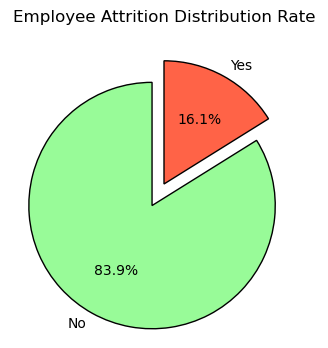

In [24]:
# Plot attrition rate pie chart

# Ensure attrition_count is correctly calculated
attrition_count = df_attrition["Attrition"].value_counts()

# Convert to a NumPy array to avoid multi-dimensional issues
attrition_values = attrition_count.values.flatten()  

# Define explode dynamically
explode = [0.2 if i == 0 else 0 for i in range(len(attrition_values))]

# Check if there is data before plotting
if attrition_values.size > 0:
    plt.figure(figsize=(4, 4)) 

    # Plot the pie chart
    plt.pie(
        attrition_values,  
        labels=attrition_count.index,  
        explode=explode,  
        autopct='%1.1f%%', 
        startangle=90,  
        colors=['palegreen', 'tomato'],  
        wedgeprops={'edgecolor': 'black'}  
    )

    plt.title("Employee Attrition Distribution Rate")
    plt.show()
else:
    print("No attrition data available.")


In [25]:
# Check attrition rate column
attrition_count = df_attrition["Attrition"].value_counts()
print(attrition_count)

Attrition
No     1233
Yes     237
Name: count, dtype: int64


#### Key Observations:
A small portion of employees are leaving, low attrition could indicate a stable workforce.
However, if attrition is concentrated in certain groups, it could signal HR or management issues.

### **Attrition Rate by Gender**

/var/folders/w9/d46gpwz136z97glrcs88z5p40000gn/T/ipykernel_32247/1684581724.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Gender", y="Attrition (%)", data=gender_attrition_df, palette=["lightblue", "lightpink"])


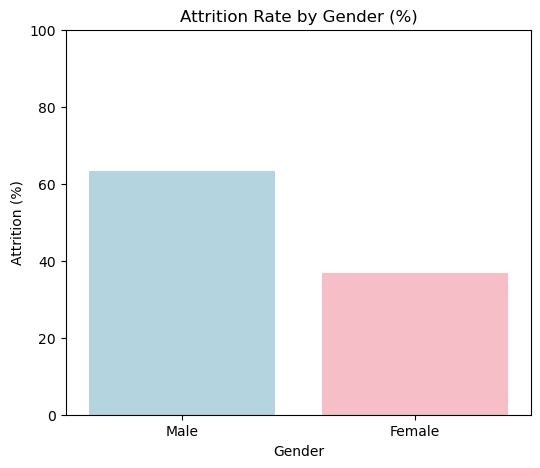

In [28]:
# Calculate attrition percentage by Gender
gender_attrition = df_attrition[df_attrition["Attrition"] == "Yes"]["Gender"].value_counts(normalize=True) * 100

# Convert to DataFrame for Seaborn
gender_attrition_df = gender_attrition.reset_index()
gender_attrition_df.columns = ["Gender", "Attrition (%)"]

# Plot bar chart
plt.figure(figsize=(6, 5))
sns.barplot(x="Gender", y="Attrition (%)", data=gender_attrition_df, palette=["lightblue", "lightpink"])

# Formatting
plt.title("Attrition Rate by Gender (%)")
plt.xlabel("Gender")
plt.ylabel("Attrition (%)")
plt.ylim(0, 100)  # Set percentage scale
plt.show()


#### Key Observations:
Males have a slightly higher attrition rate than females. However, the difference is small, thus gender may not be the primary factor influencing attrition.

### Attrition Rate by Department**

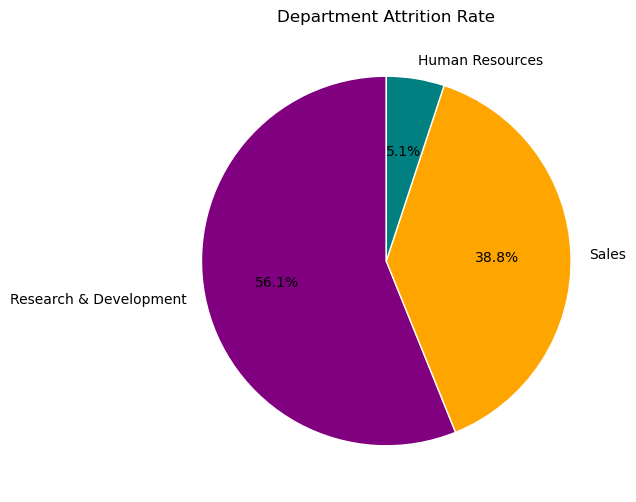

In [31]:
# Plot attrition rate pie chart by Department

# Define department colors 
department_colors = {
    "Research & Development": "purple",  
    "Sales": "orange",  
    "Human Resources": "teal" 
}

# Number of attrition cases per department
dept_attrition_count = df_attrition[df_attrition["Attrition"] == "Yes"]["Department"].value_counts()

# Check if there is data to plot
if not dept_attrition_count.empty:
# Plot the pie chart
    plt.figure(figsize=(6, 6)) 
    plt.pie(
        dept_attrition_count.values,  
        labels=dept_attrition_count.index,  
        autopct='%1.1f%%', 
        startangle=90, 
        colors=[department_colors[dept] for dept in dept_attrition_count.index], 
        wedgeprops={'edgecolor': 'white'} 
    )

# Add title and show plot
    plt.title("Department Attrition Rate")
    plt.show()
else:
    print("No attrition data found for departments.")


#### Key Observations:
R&D and Sales have higher attrition compared to Human Resources. R&D shows the highest attrition rate, indicating high turnover rate in technical roles which may be a concern and may impact the business in long term.

### **Attrition Rate and Monthly Income Correlation**

/var/folders/w9/d46gpwz136z97glrcs88z5p40000gn/T/ipykernel_32247/4119892249.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


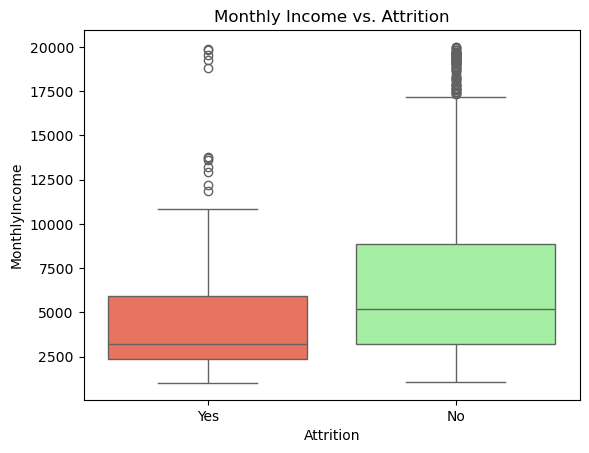

In [34]:
# Plot boxplot with correct data
sns.boxplot(
    x="Attrition", 
    y="MonthlyIncome", 
    data=df_attrition, 
    palette=["tomato", "palegreen"]  
)

# Add title and show plot
plt.title("Monthly Income vs. Attrition")
plt.show()

#### Key Observations:
Employees who has lower-income employees tend to leave more (attrition is higher at lower salary levels). While higher-income employees are more likely to stay, with a wider salary range among those who remain. Outliers exist in both groups, but high earners mostly stay. Hence, salary could be a key factor in attrition, but other factors may also play a role.


### **Work-Life Balance & OverTime Impact**

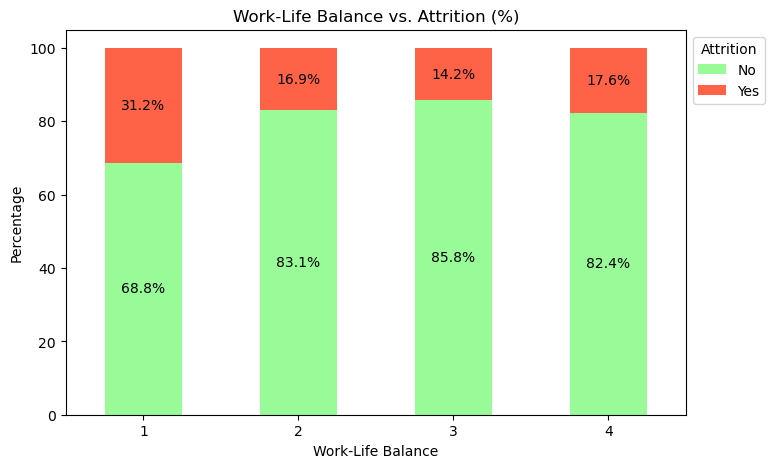

In [42]:
# Ensure "No" is at the bottom and "Yes" is at the top
worklife_attrition = worklife_attrition.reindex(columns=["No", "Yes"])

# Create stacked bar chart
ax = worklife_attrition.plot(kind="bar", stacked=True, figsize=(8, 5), color=["palegreen", "tomato"])

# Include percentage labels inside the bars
for bars in ax.containers:
    for bar in bars:
        height = bar.get_height()
        if height > 0:  # Only label non-zero values
            ax.text(bar.get_x() + bar.get_width()/2, bar.get_y() + height/2, 
                    f'{height:.1f}%', ha='center', va='center', fontsize=10, color='black')

# Labels and title
plt.xlabel("Work-Life Balance")
plt.ylabel("Percentage")
plt.title("Work-Life Balance vs. Attrition (%)")

# Adjust the position of legend information
plt.legend(title="Attrition", labels=["No", "Yes"], loc="upper left", bbox_to_anchor=(1, 1))

# x-axis label position
plt.xticks(rotation=0)

# Show plot
plt.show()



#### Key Observations:
Employees with Lower Work-Life Balance leads to higher attrition and employees with WLB rating 3 are the most stable.
Action required: Improving WLB may help reduce attrition further.

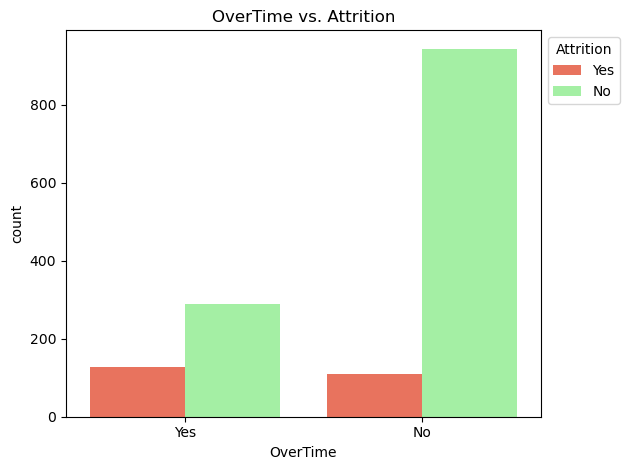

In [45]:
# OverTime Impact on Attrition
sns.countplot(x="OverTime", hue="Attrition", data=df_attrition, palette=["tomato", "palegreen"])
plt.title("OverTime vs. Attrition")

# Move legend to the right side
plt.legend(title="Attrition", loc="upper left", bbox_to_anchor=(1, 1))

# Adjust layout to prevent cutoff
plt.tight_layout()

plt.show()


#### Key Observations:
Employees who work overtime have significantly higher attrition. Employees without overtime are more likely to stay. 
May wish to consider reducing excessive overtime or increasing manpower for required department may help lower attrition rates.

### **Employee Tenure & Promotion Impact**

/var/folders/w9/d46gpwz136z97glrcs88z5p40000gn/T/ipykernel_32247/149056431.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Attrition", y="YearsSinceLastPromotion", data=df_attrition, palette=["tomato", "palegreen"])


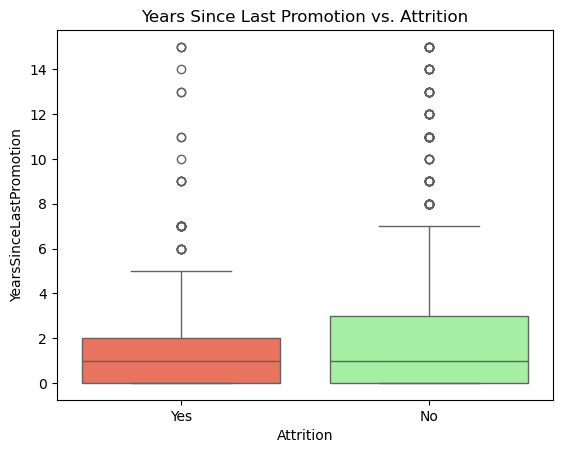

In [49]:
# Years Since Last Promotion vs. Attrition
sns.boxplot(x="Attrition", y="YearsSinceLastPromotion", data=df_attrition, palette=["tomato", "palegreen"])
plt.title("Years Since Last Promotion vs. Attrition")
plt.show()


#### Key Observations:
Employees who left the company had fewer promotions. The majority of attrition cases had no recent promotions. Employees who stayed had a higher median time since their last promotion. Some employees stay despite long promotion gaps, indicating other factors may influence retention. HR and business can work on the career growth opportunities (promotions) to/may help with reducing attrition.


### **Job Satisfaction & Employee Retention**

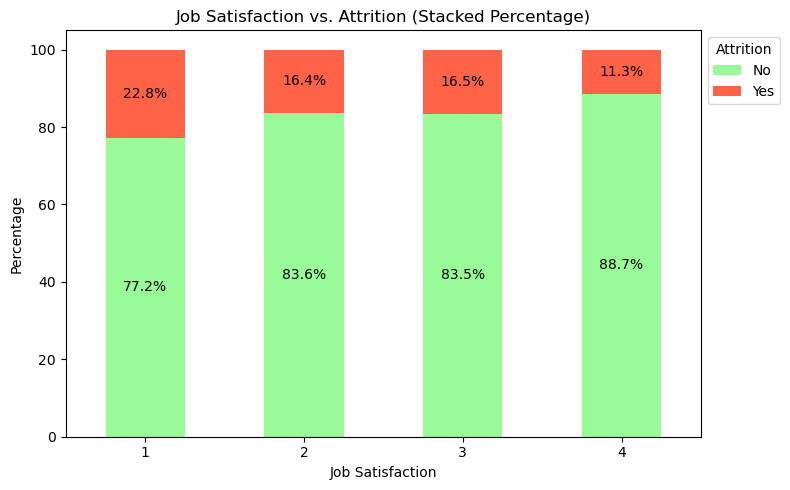

In [53]:
# Calculate percentage attrition for each Job Satisfaction level
jobsat_attrition = df_attrition.groupby("JobSatisfaction")["Attrition"].value_counts(normalize=True).unstack() * 100

# Reorder columns so that "No" is at the bottom and "Yes" is at the top
jobsat_attrition = jobsat_attrition.reindex(columns=["No", "Yes"])

# Create the stacked bar chart
ax = jobsat_attrition.plot(kind="bar", stacked=True, figsize=(8, 5), color=["palegreen", "tomato"])

# Add percentage labels inside the bars
for bars in ax.containers:
    for bar in bars:
        height = bar.get_height()
        if height > 0: 
            ax.text(bar.get_x() + bar.get_width()/2, bar.get_y() + height/2, 
                    f'{height:.1f}%', ha='center', va='center', fontsize=10, color='black')

# Labels and title
plt.xlabel("Job Satisfaction")
plt.ylabel("Percentage")
plt.title("Job Satisfaction vs. Attrition (Stacked Percentage)")

# Move legend outside the chart 
plt.legend(title="Attrition", labels=["No", "Yes"], loc="upper left", bbox_to_anchor=(1, 1))

# Better spacing
plt.xticks(rotation=0)
plt.tight_layout()

# Show plot
plt.show()



#### Key Observations:
Employees with lower job satisfaction (1 & 2) has higher attrition rates (with 22.8% attrition for Job Satisfaction = 1). Whereas, for employees with higher job satisfaction (3 & 4) are less likely to leave (with only 11.3% attrition for Job Satisfaction = 4).
HR and Business can considering to implement ways to improve job satisfaction which may help to reduce employee attrition.


### **Attrition Rate by Frequent Business Traveling**

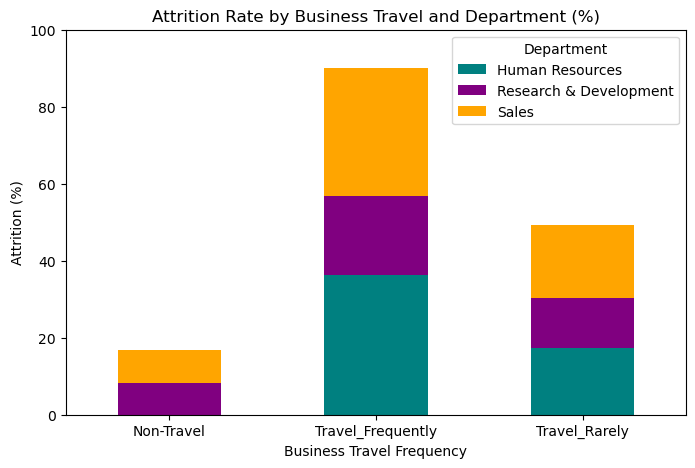

In [57]:
# Define department colors 
department_colors = {
    "Research & Development": "purple",  
    "Sales": "orange",
    "Human Resources": "teal"
}

# Create a crosstab to calculate attrition percentage by Business Travel & Department
attrition_by_travel_dept = pd.crosstab(
    index=df_attrition["BusinessTravel"], 
    columns=df_attrition["Department"], 
    values=(df_attrition["Attrition"] == "Yes").astype(int),  # Convert to int for mean calculation
    aggfunc="mean"
) * 100  # Convert to percentage

# Plot stacked bar chart with updated department colors
ax = attrition_by_travel_dept.plot(
    kind="bar", stacked=True, figsize=(8, 5), 
    color=[department_colors[dept] for dept in attrition_by_travel_dept.columns]
)

# Formatting
plt.title("Attrition Rate by Business Travel and Department (%)")
plt.xlabel("Business Travel Frequency")
plt.ylabel("Attrition (%)")
plt.legend(title="Department")
plt.ylim(0, 100)  # Set percentage scale
plt.xticks(rotation=0)  # Keep x-labels readable

# Show plot
plt.show()


#### Key Observations:
Frequent business travel is linked to higher attrition, mainly from HR and Sales. Sales employees are more likely to leave, especially with high travel demands. Non-traveling employees experience the lowest attrition, indicating stability. HR and Business may consider some ways to reduce turnover by offering better travel incentives or balancing travel.